In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
outpath='HAT-264-0000145.rlc.tfalc'
data=Table.read(outpath,format='ascii')
t=data['col2']
mag=data['col8']

Text(0.5, 0, 'time (BJD-2454833)')

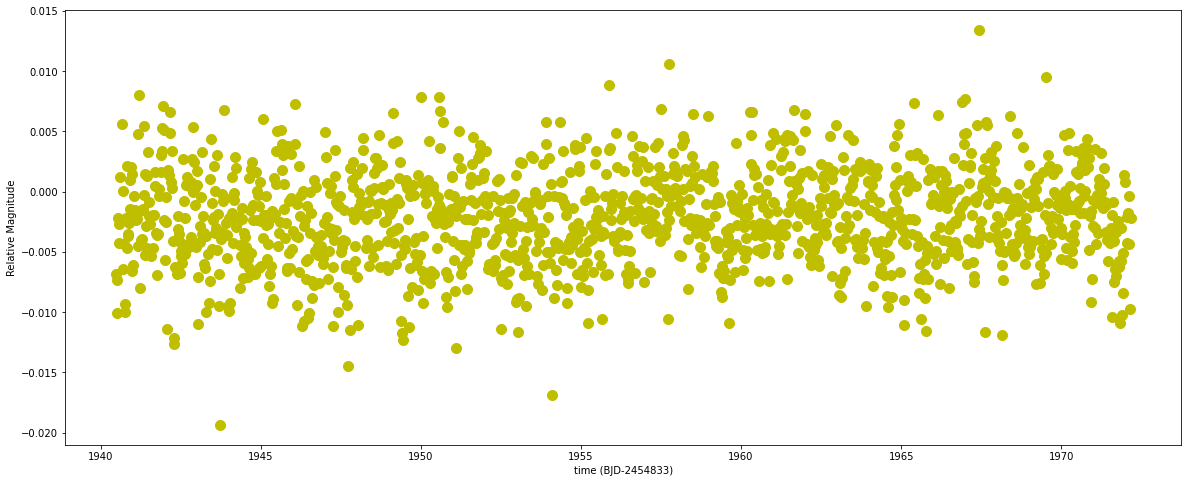

In [3]:
plt.figure(figsize=(20,8))
plt.plot(t,mag,'yo',markersize=10,label='HAT-264-0041278')
plt.ylabel('Relative Magnitude')
plt.xlabel('time (BJD-2454833)')

In [4]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

[I 200812 22:17:50 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200812 22:17:50 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


In [5]:
dates=data['col2']
fluxes=data['col8']
errs=fluxes*0.01

In [6]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs)

[I 200812 22:18:18 zgls:597] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200812 22:18:18 zgls:607] using 6 workers...


In [7]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs)

[I 200812 22:18:49 nonphysical:216] spline fit done. nknots = 13,  chisq = 13486289.59372, reduced chisq = 9829.65714
[I 200812 22:18:49 png:696] plotting phased LC with period 0.180259, epoch 1947.50603
[I 200812 22:18:49 nonphysical:216] spline fit done. nknots = 13,  chisq = 13570895.08114, reduced chisq = 9891.32295
[I 200812 22:18:49 png:696] plotting phased LC with period 0.090130, epoch 1968.77543
[I 200812 22:18:49 nonphysical:216] spline fit done. nknots = 13,  chisq = 13485306.43820, reduced chisq = 9828.94055
[I 200812 22:18:49 png:696] plotting phased LC with period 0.360518, epoch 1949.48790
[I 200812 22:18:49 nonphysical:216] spline fit done. nknots = 13,  chisq = 13512918.19611, reduced chisq = 9849.06574
[I 200812 22:18:49 png:696] plotting phased LC with period 0.698008, epoch 1970.49171
[I 200812 22:18:49 nonphysical:216] spline fit done. nknots = 13,  chisq = 13492438.24117, reduced chisq = 9834.13866
[I 200812 22:18:49 png:696] plotting phased LC with period 1.28819

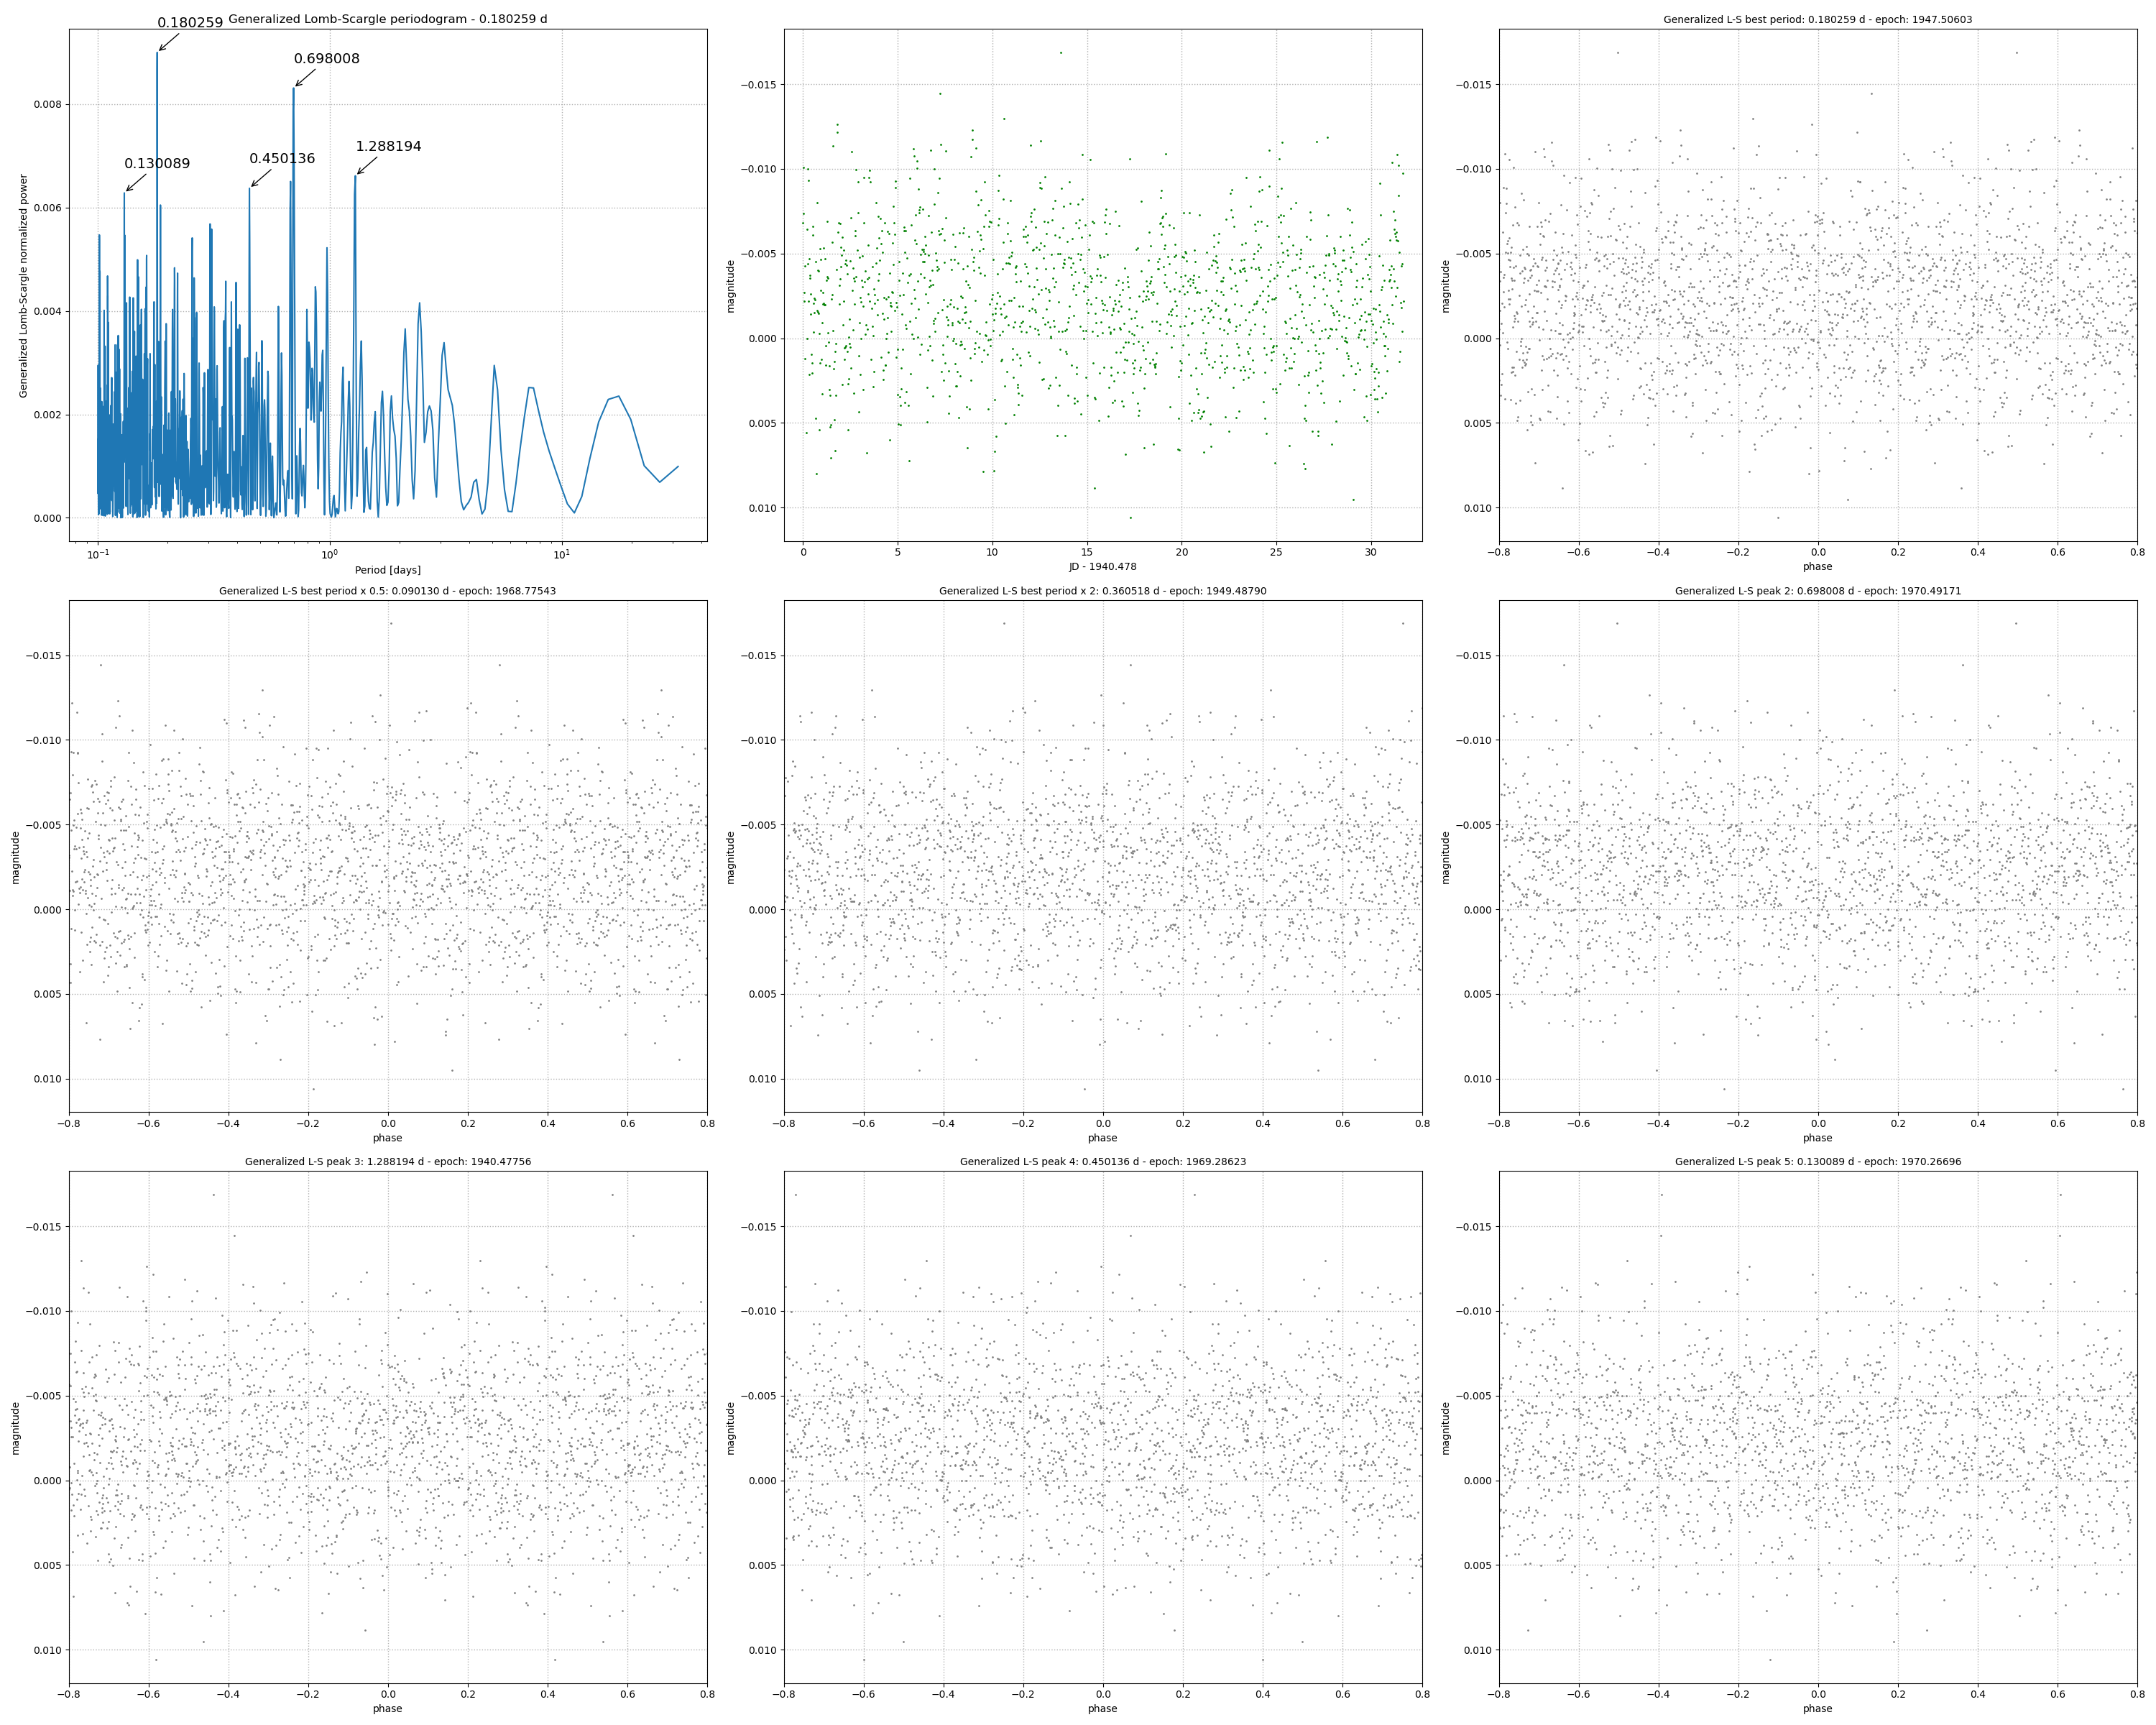

In [8]:
from IPython.display import Image
Image('0000145-checkplot-glsp.png')

In [9]:
glsp

{'bestperiod': 0.18025918987485726,
 'bestlspval': 0.00900195325235202,
 'nbestpeaks': 5,
 'nbestlspvals': [0.00900195325235202,
  0.008313401871012902,
  0.006615117507225674,
  0.006373680739230668,
  0.0062843887094704886],
 'nbestperiods': [0.18025918987485726,
  0.6980080524229054,
  1.2881937227642237,
  0.4501358747159077,
  0.13008852865353],
 'lspvals': array([0.00099397, 0.0006889 , 0.00100786, ..., 0.00047025, 0.00080233,
        0.00150919]),
 'omegas': array([ 0.198273  ,  0.2379276 ,  0.2775822 , ..., 62.73357791,
        62.77323251, 62.81288711]),
 'periods': array([31.68956558, 26.40797132, 22.63540399, ...,  0.10015665,
         0.10009338,  0.10003019]),
 'method': 'gls',
 'kwargs': {'startp': None,
  'endp': None,
  'stepsize': 0.0001,
  'autofreq': True,
  'periodepsilon': 0.1,
  'nbestpeaks': 5,
  'sigclip': 10.0}}

In [10]:
print('LS algorithm:',(glsp['nbestperiods']),'(days)')

LS algorithm: [0.18025918987485726, 0.6980080524229054, 1.2881937227642237, 0.4501358747159077, 0.13008852865353] (days)


In [11]:
bls=periodbase.bls_parallel_pfind(dates,fluxes,errs)

[I 200812 22:20:40 abls:919] min P: 0.1, max P: 100.0, nfreq: 126632, minfreq: 0.01, maxfreq: 10.0
[I 200812 22:20:40 abls:922] autofreq = True: using AUTOMATIC values for freq stepsize: 7.889032096980886e-05, ndurations: 100, min transit duration: 0.01, max transit duration: 0.4
[W 200812 22:20:40 abls:964] the requested max P = 100.000 is larger than the time base of the observations = 31.690,  will make minfreq = 2 x 1/timebase
[W 200812 22:20:40 abls:969] new minfreq: 0.0631122567758471, maxfreq: 10.0
[I 200812 22:20:40 abls:980] using 6 workers...
[I 200812 22:20:40 abls:1090] worker 1: minfreq = 0.063112, nfreqs = 21105
[I 200812 22:20:40 abls:1090] worker 2: minfreq = 1.728092, nfreqs = 21105
[I 200812 22:20:40 abls:1090] worker 3: minfreq = 3.393073, nfreqs = 21105
[I 200812 22:20:40 abls:1090] worker 4: minfreq = 5.058053, nfreqs = 21105
[I 200812 22:20:40 abls:1090] worker 5: minfreq = 6.723033, nfreqs = 21105
[I 200812 22:20:40 abls:1090] worker 6: minfreq = 8.388013, nfreqs

In [12]:
cp = checkplot.checkplot_png(bls, dates, fluxes, errs)

[W 200812 22:21:05 png:1142] no best period found for this object, skipping...


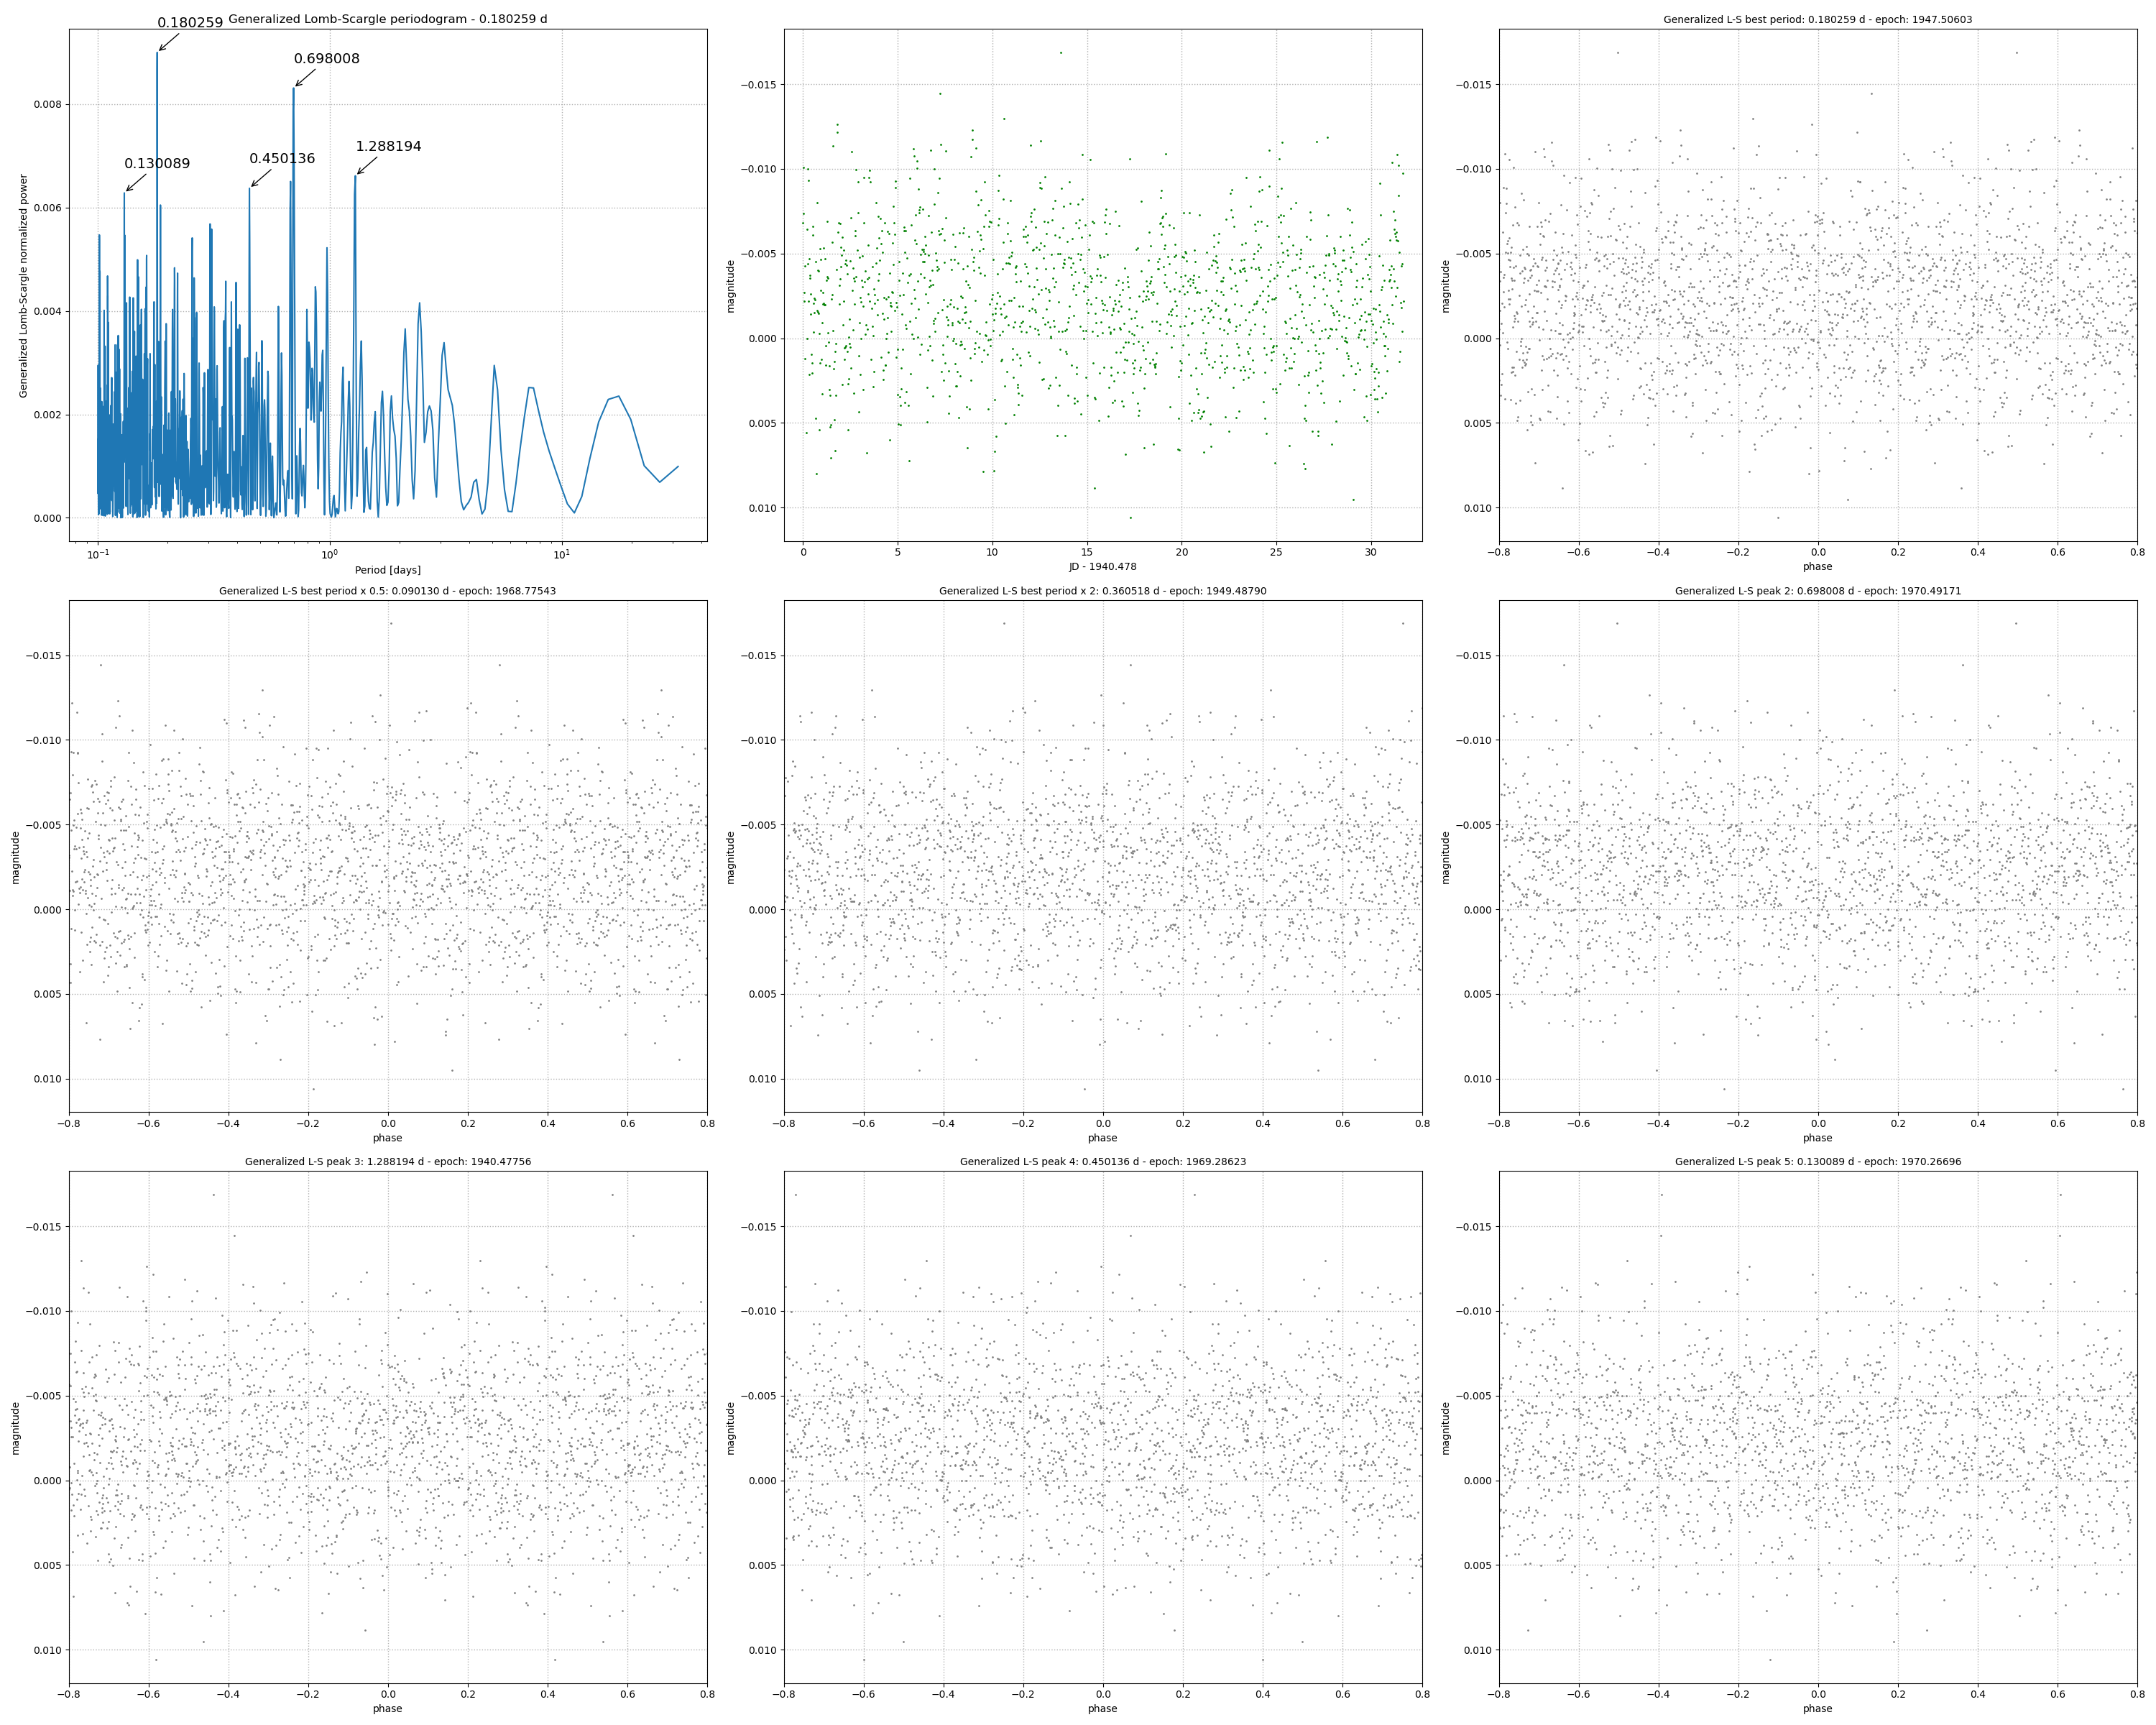

In [14]:
Image('0000145-checkplot-glsp.png')
# This is the same checkplot from before because no best period was found to create a new checkplot. 

In [15]:
spdm = periodbase.stellingwerf_pdm(dates,fluxes,errs)

[I 200812 22:23:01 spdm:337] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200812 22:23:01 spdm:349] using 6 workers...


In [16]:
cp = checkplot.checkplot_png(spdm, dates, fluxes, errs)

[I 200812 22:23:20 nonphysical:216] spline fit done. nknots = 13,  chisq = 13658444.50787, reduced chisq = 9955.13448
[I 200812 22:23:20 png:696] plotting phased LC with period 3.106820, epoch 1971.69719
[I 200812 22:23:20 nonphysical:216] spline fit done. nknots = 13,  chisq = 13610169.72859, reduced chisq = 9919.94878
[I 200812 22:23:20 png:696] plotting phased LC with period 1.553410, epoch 1941.96906
[I 200812 22:23:20 nonphysical:216] spline fit done. nknots = 13,  chisq = 13751375.47117, reduced chisq = 10022.86842
[I 200812 22:23:20 png:696] plotting phased LC with period 6.213640, epoch 1948.77279
[I 200812 22:23:20 nonphysical:216] spline fit done. nknots = 13,  chisq = 13582647.77601, reduced chisq = 9907.10998
[I 200812 22:23:20 png:696] plotting phased LC with period 6.337913, epoch 1948.67063
[I 200812 22:23:20 nonphysical:216] spline fit done. nknots = 13,  chisq = 13508102.64663, reduced chisq = 9845.55586
[I 200812 22:23:20 png:696] plotting phased LC with period 12.188

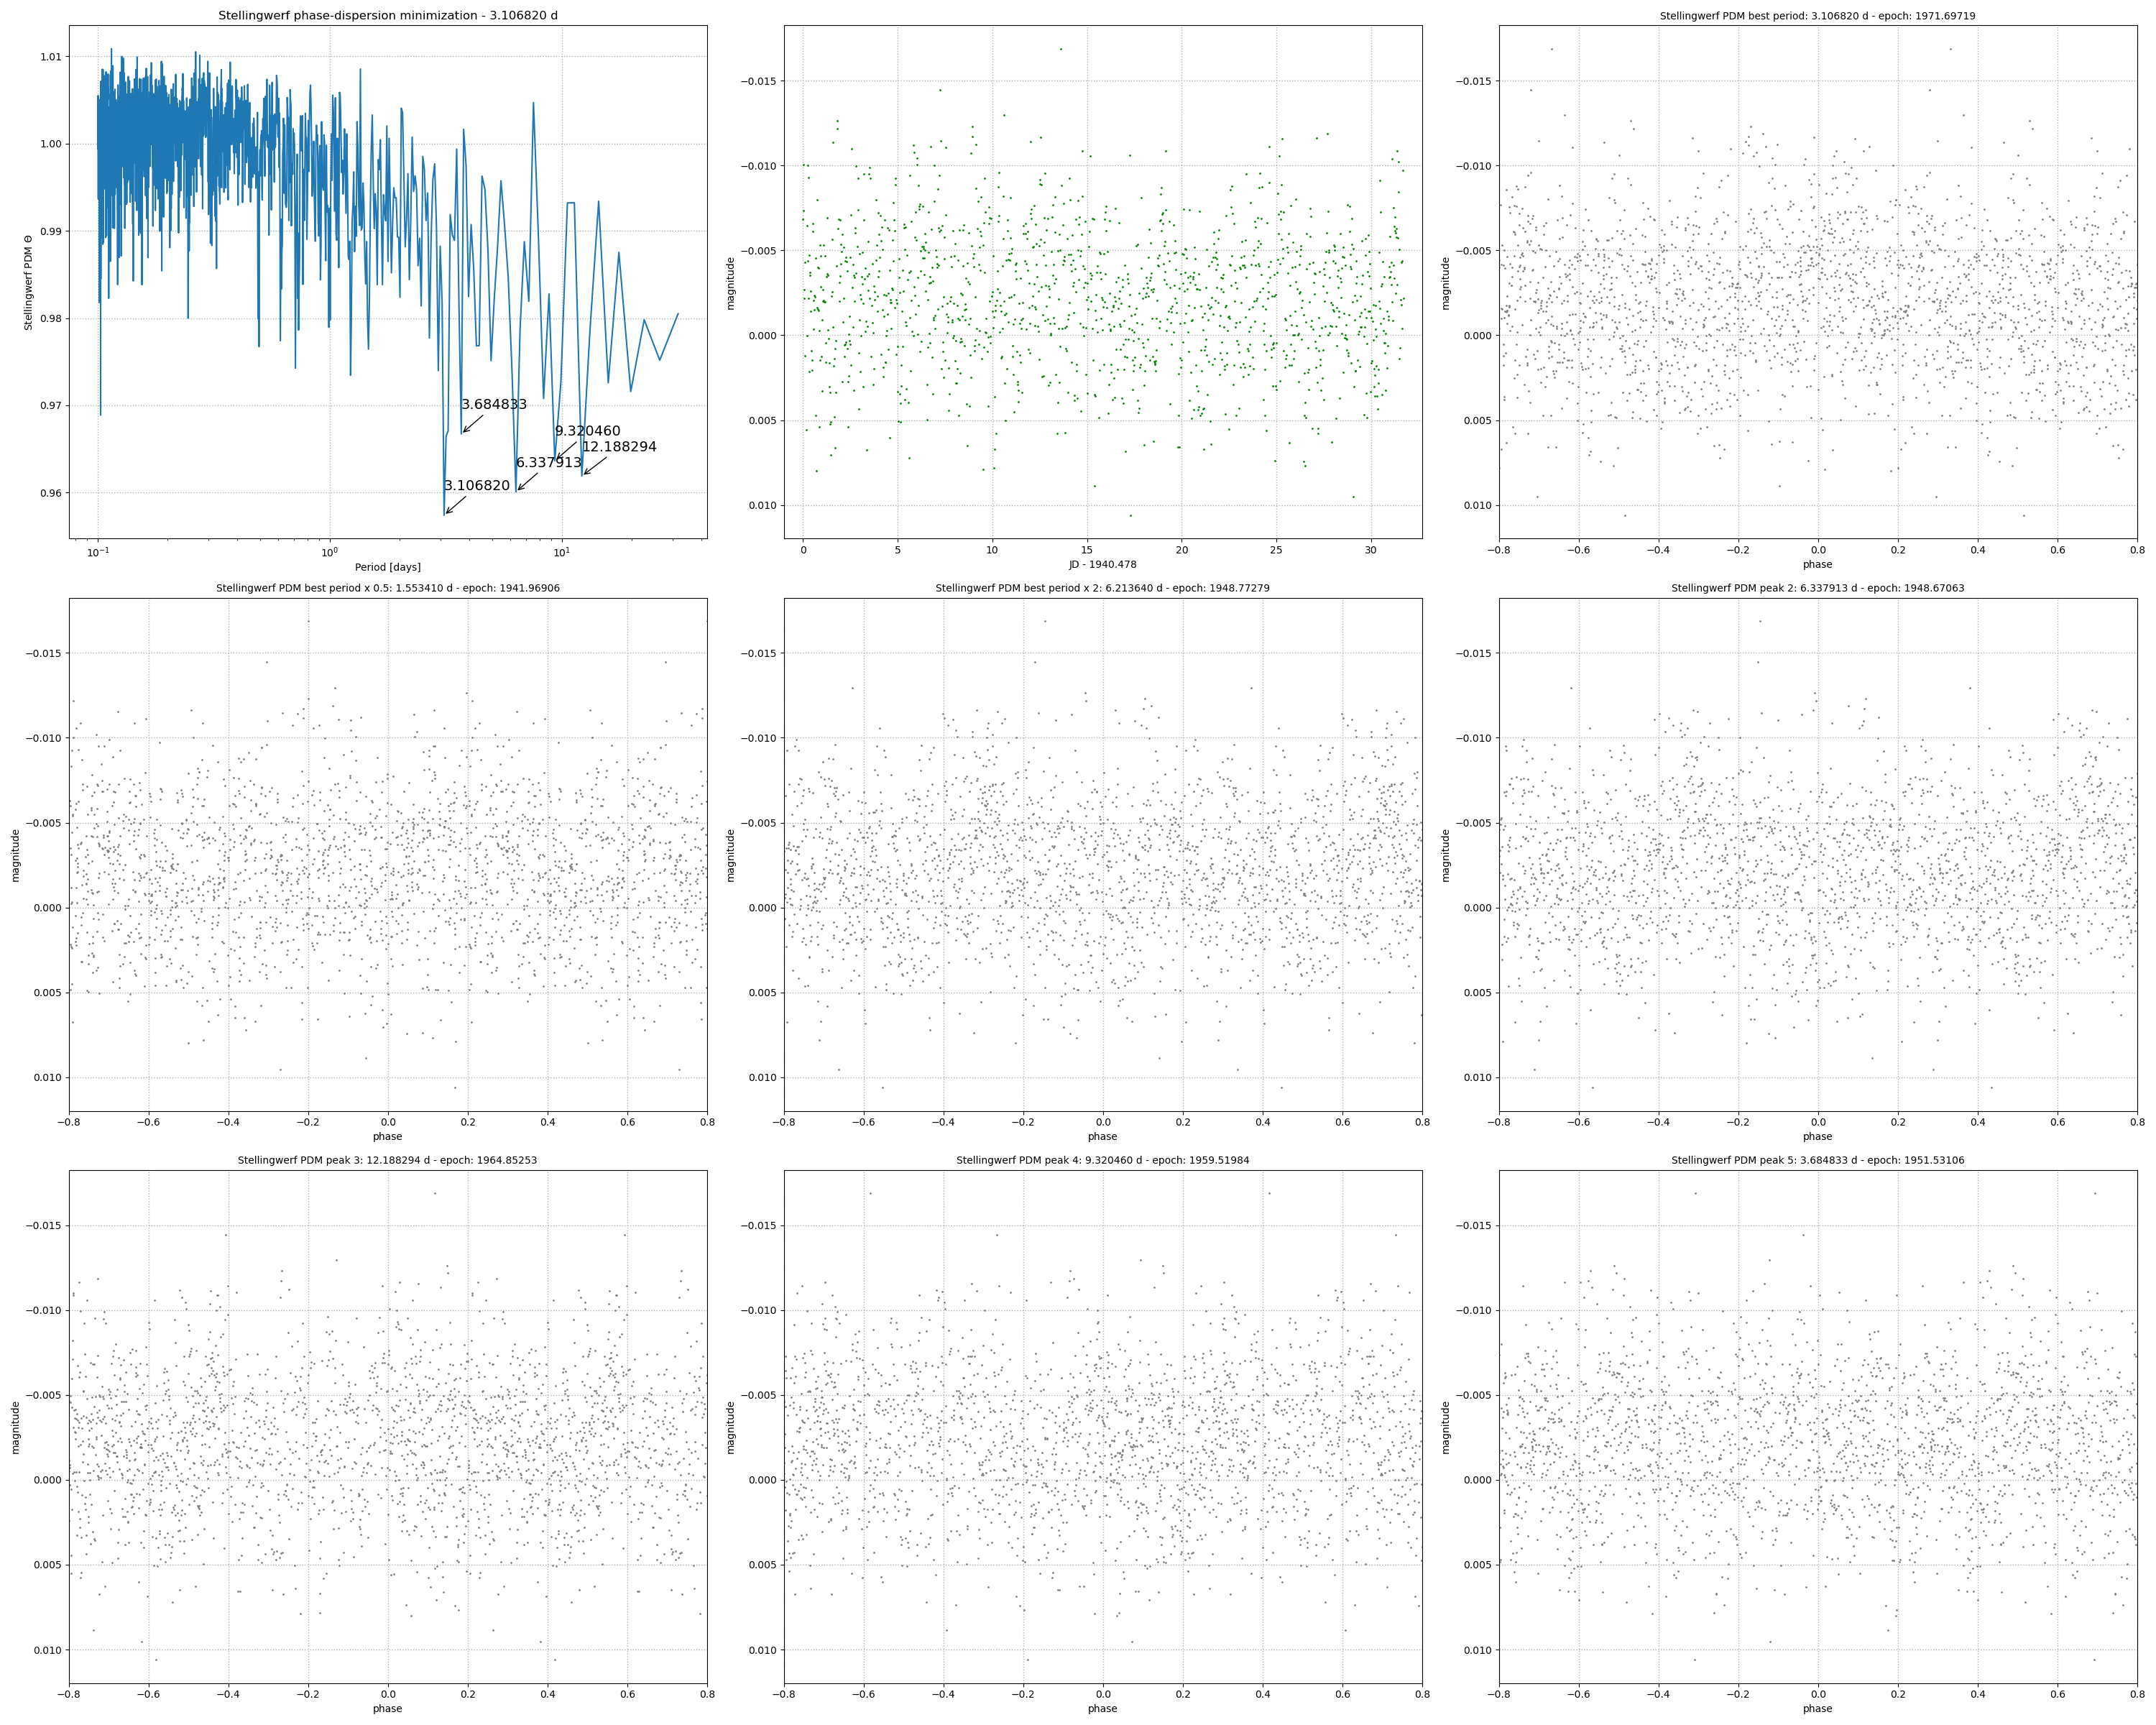

In [17]:
Image('0000145-checkplot-spdm.png')

In [18]:
print('PDM algorithm:',(spdm['nbestperiods']),'(days)')

PDM algorithm: [3.1068201549019516, 6.3379131159999815, 12.188294453846117, 9.320460464705855, 3.6848332069767333] (days)
